In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing clustering model libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Step 1: Read the McDonald's customer perception data
file_path = "mcdonalds.csv"  # Replace with your file path if needed
data = pd.read_csv(file_path)


In [5]:
# Display first few rows of the data
print("Initial Data:")
print(data.head())

Initial Data:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [6]:
# Step 2: Data Preprocessing
# Convert categorical 'Yes'/'No' values to 1/0
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [7]:
# Convert 'Like' column to numeric values and handle missing or unexpected values
data['Like'] = data['Like'].astype(str)  # Ensure all values are strings
like_mapping = {'+1': 1, '+2': 2, '+3': 3, '+4': 4, '-1': -1, '-2': -2, '-3': -3}
data['Like'] = data['Like'].map(like_mapping).fillna(0).astype(int)  # Map values and fill NaNs with 0

In [8]:
# Encode 'VisitFrequency' and 'Gender' to numeric values
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [9]:
# Step 3: Handle Missing Values
# Check for missing values in the dataset
print("Missing values in the dataset:\n", data.isnull().sum())

Missing values in the dataset:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [10]:
# Handle missing values by filling with the mean of each column
data_filled = data.fillna(data.mean())

In [11]:
# Step 4: Data Scaling
# Selecting features for clustering
features = categorical_columns + ['Like']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled[features])

In [12]:
# Step 5: Implement K-Means Clustering Algorithm
# Find the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster Sum of Square
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

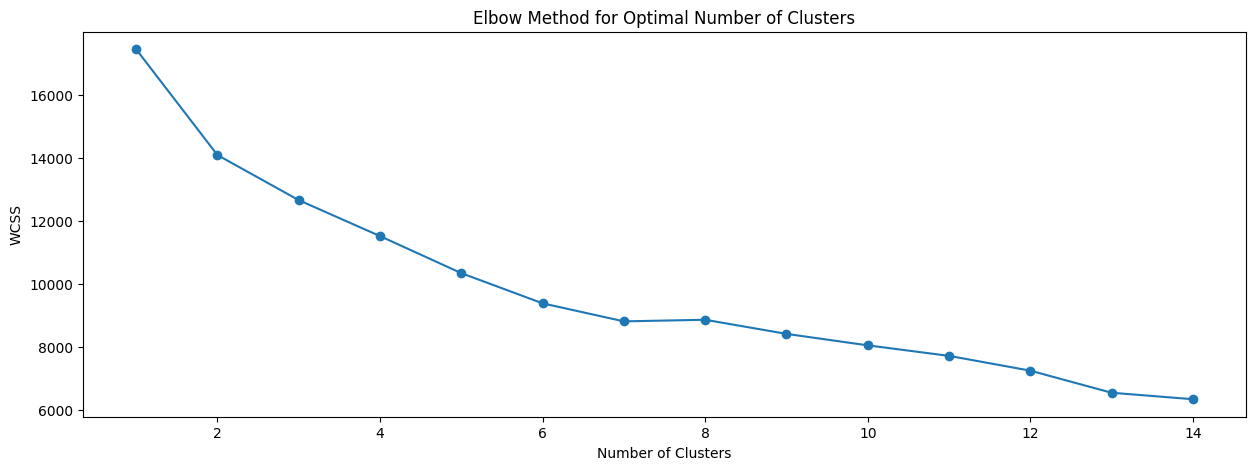

In [13]:
# Plot the Elbow method graph
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Create K-means model with the optimal number of clusters (Assuming 5 from elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)

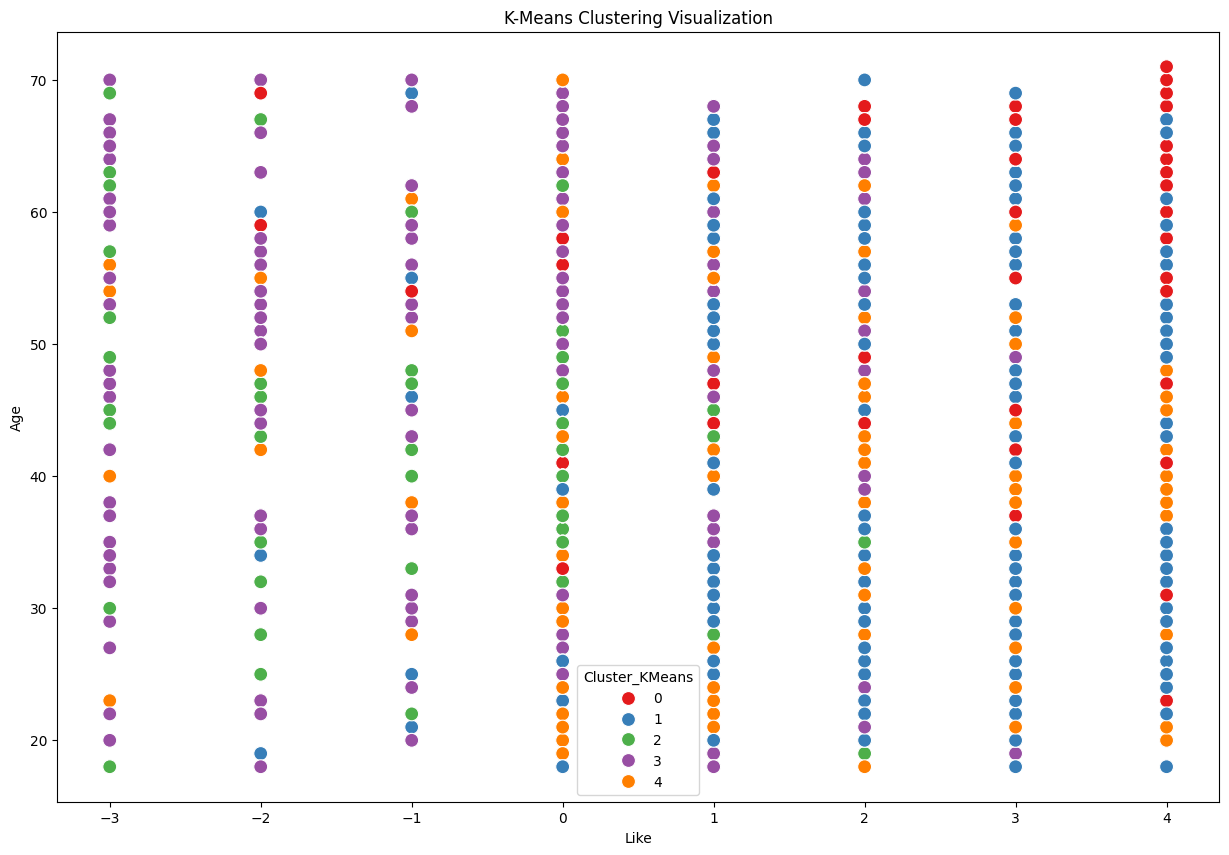

In [15]:
# Step 6: Visualizing the K-Means Clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Like', y='Age', hue='Cluster_KMeans', data=data, palette='Set1', s=100)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Like')
plt.ylabel('Age')
plt.show()

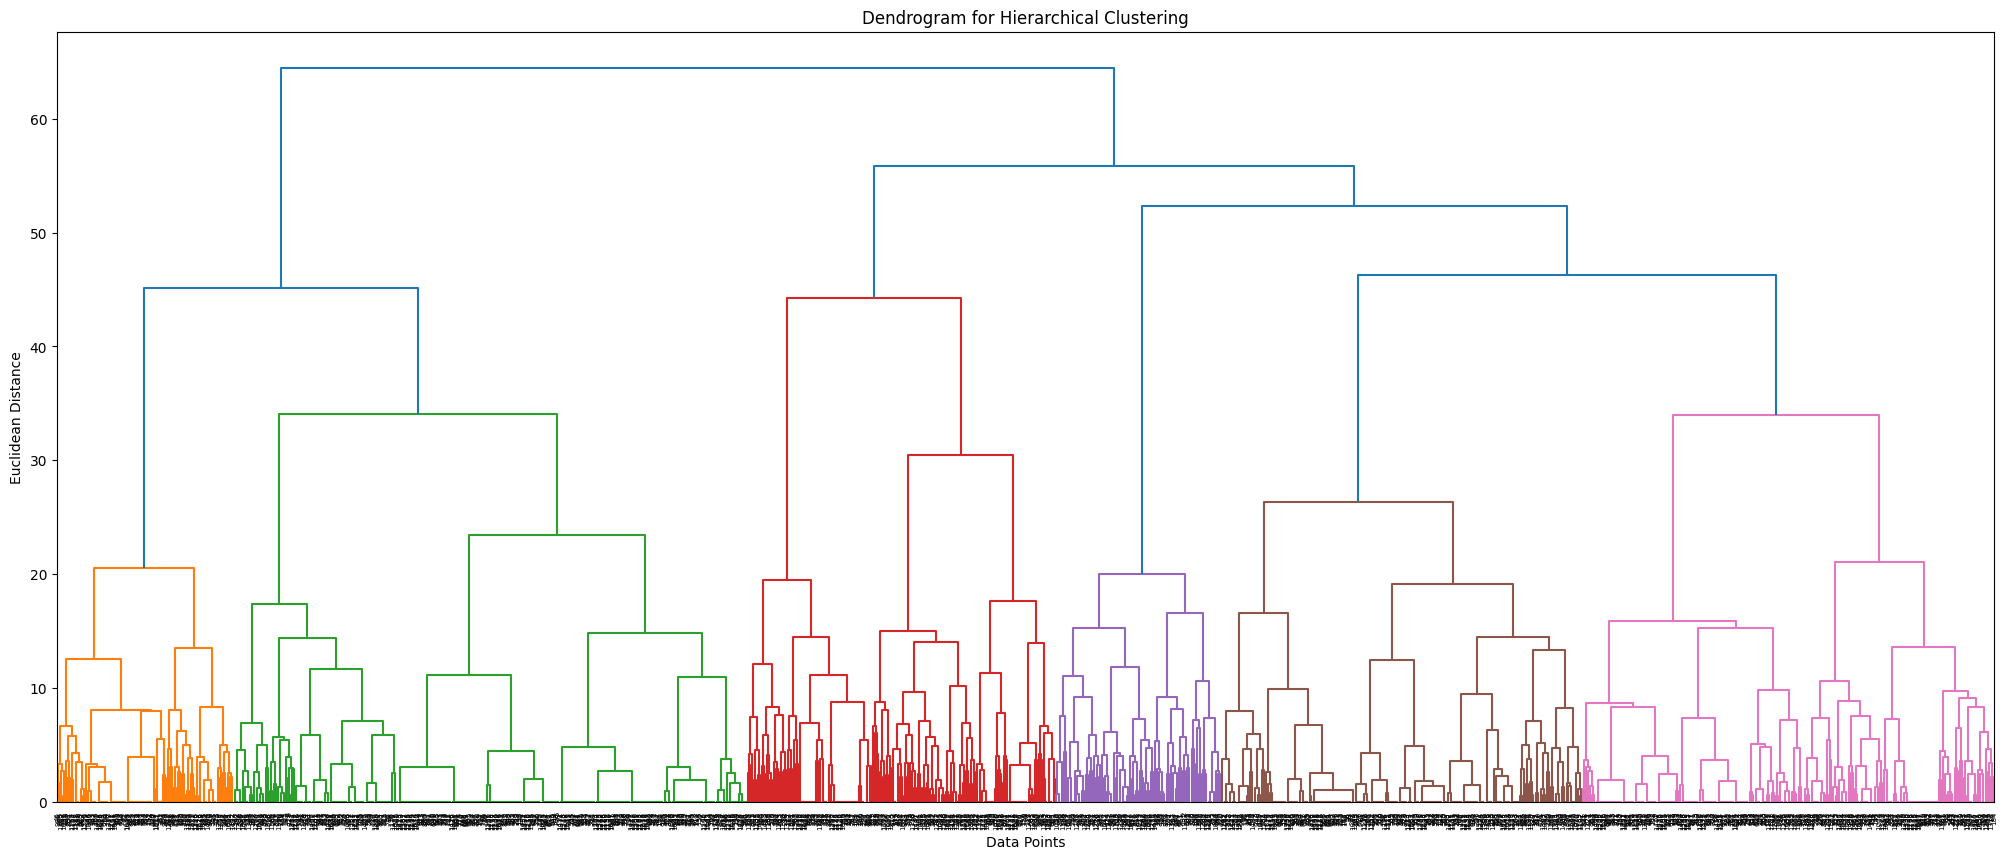

In [16]:
# Step 7: Implement Hierarchical Clustering Algorithm
# Create the linkage matrix for the hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(25, 10))
dendrogram(linkage_matrix, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
# Create Hierarchical clustering model (using 'metric' instead of deprecated 'affinity')
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Cluster_Hierarchical'] = hierarchical_cluster.fit_predict(scaled_data)

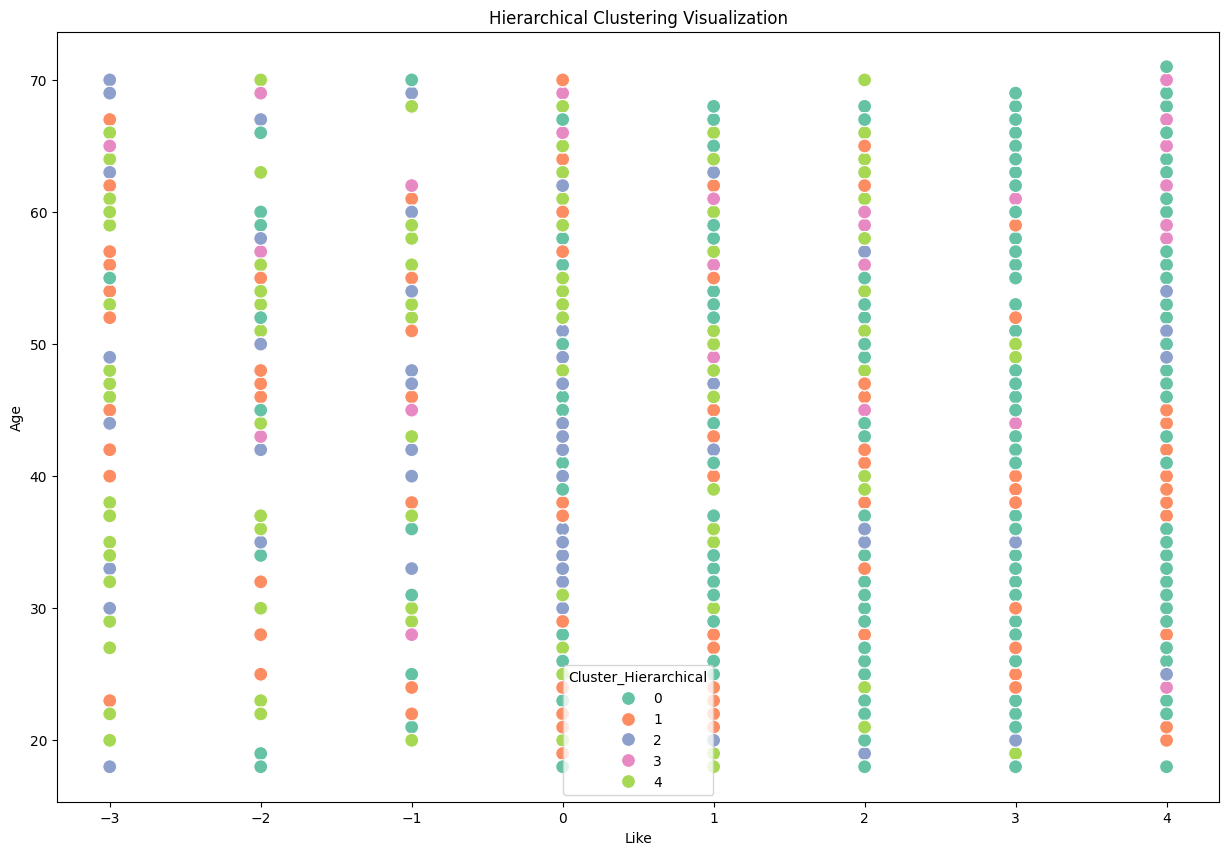

In [18]:
# Step 8: Visualize the Hierarchical Clustering Segments
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Like', y='Age', hue='Cluster_Hierarchical', data=data, palette='Set2', s=100)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Like')
plt.ylabel('Age')
plt.show()

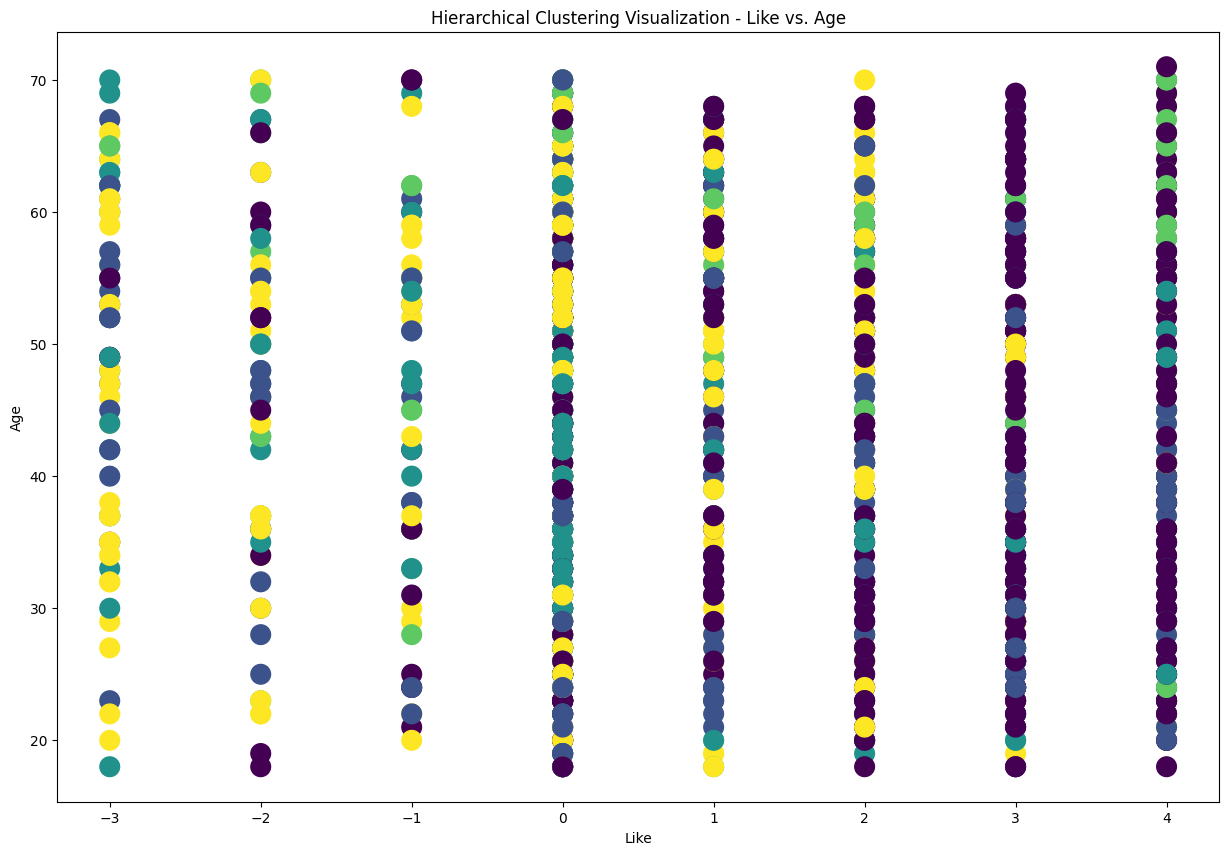

In [19]:
# Additional Hierarchical Clustering Visualization
# Use the features 'Like' and 'Age' for demonstration
data_model = data[['Like', 'Age']]  # Select relevant features for visualization (adjust based on availability)
plt.figure(figsize=(15, 10))
plt.scatter(x='Like', y='Age', data=data_model, c=data['Cluster_Hierarchical'], s=200, cmap='viridis')
plt.title('Hierarchical Clustering Visualization - Like vs. Age')
plt.xlabel('Like')
plt.ylabel('Age')
plt.show()


In [20]:
# Step 9: Profile the clusters (K-means)
cluster_profile = data.groupby('Cluster_KMeans')[categorical_columns + ['Age', 'VisitFrequency', 'Gender']].mean()
print("\nK-Means Cluster Profiles:\n", cluster_profile)


K-Means Cluster Profiles:
                    yummy  convenient     spicy  fattening    greasy      fast  \
Cluster_KMeans                                                                  
0               0.746988    0.945783  0.126506   0.000000  0.060241  0.933735   
1               0.918322    0.986755  0.075055   1.000000  0.421634  0.964680   
2               0.016304    0.413043  0.081522   0.918478  0.793478  0.641304   
3               0.037736    0.984277  0.081761   0.977987  0.660377  0.965409   
4               0.746988    0.981928  0.120482   0.984940  0.626506  0.876506   

                   cheap     tasty  expensive   healthy  disgusting  \
Cluster_KMeans                                                        
0               0.698795  0.831325   0.198795  0.632530    0.024096   
1               0.924945  0.975717   0.013245  0.225166    0.046358   
2               0.179348  0.065217   0.804348  0.032609    0.880435   
3               0.849057  0.220126   0.066038  0.